
Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

After converting 'SignupDate' to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        -----

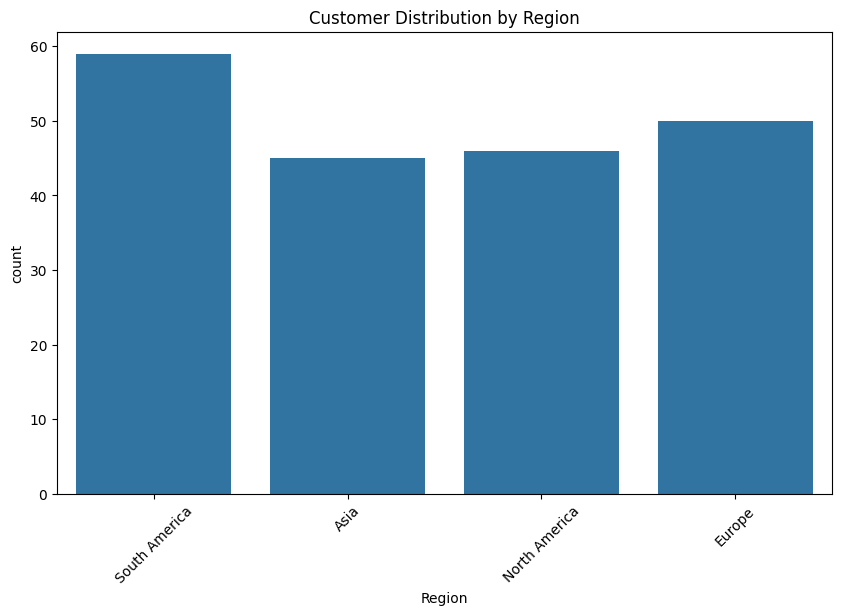






Plotting Product Price Distribution...


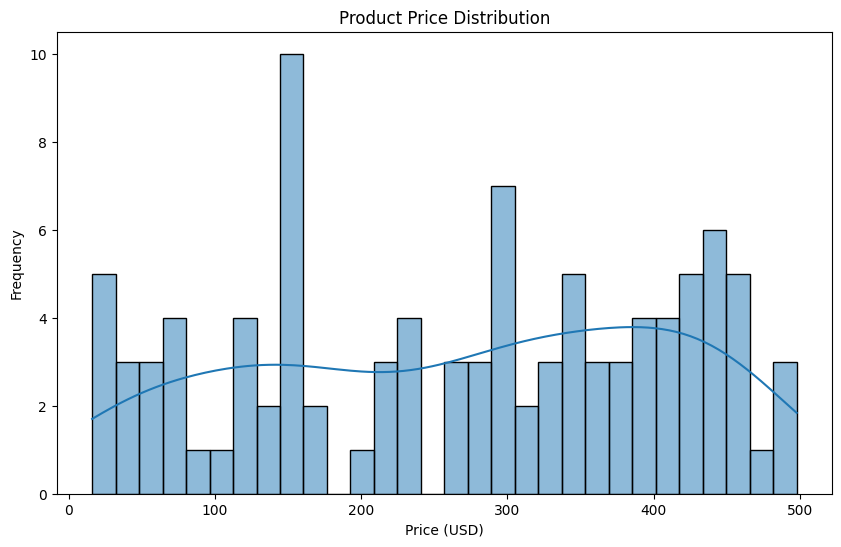






Plotting Transaction Total Value Distribution...


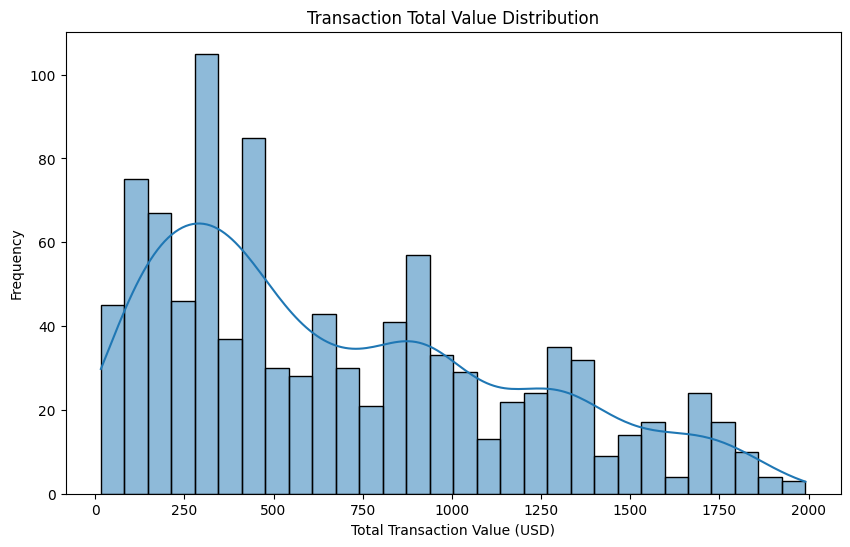






Plotting Quantity Sold Distribution...


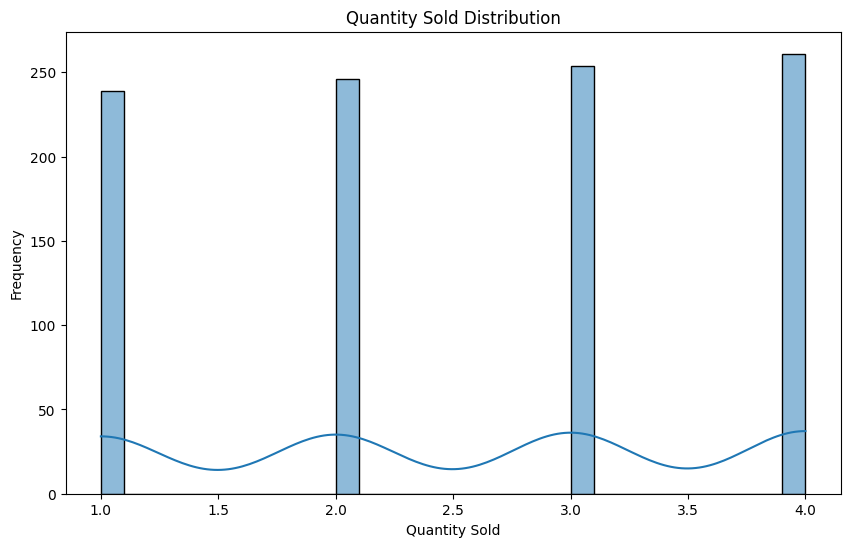






Plotting Customer Signups Over Time...


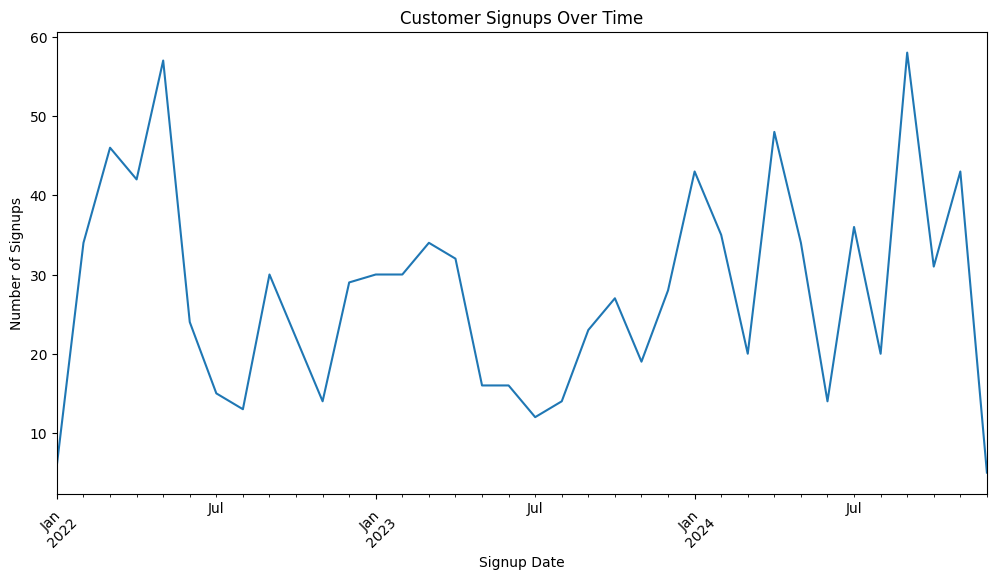






Plotting Transactions Over Time...


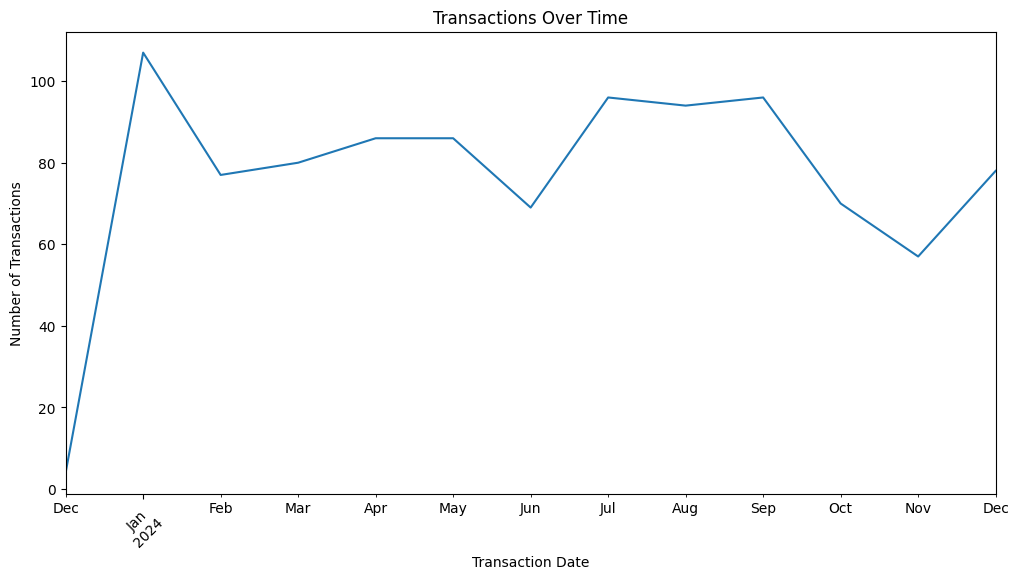






Plotting Correlation Matrix...


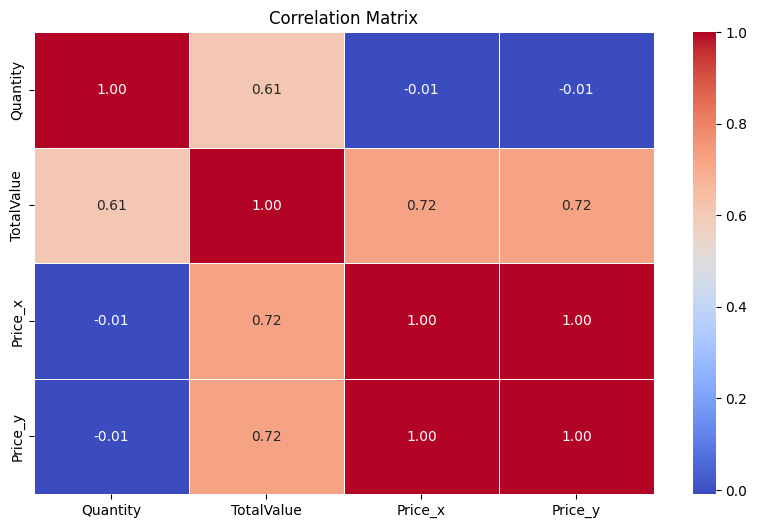






Plotting Product Distribution by Category...


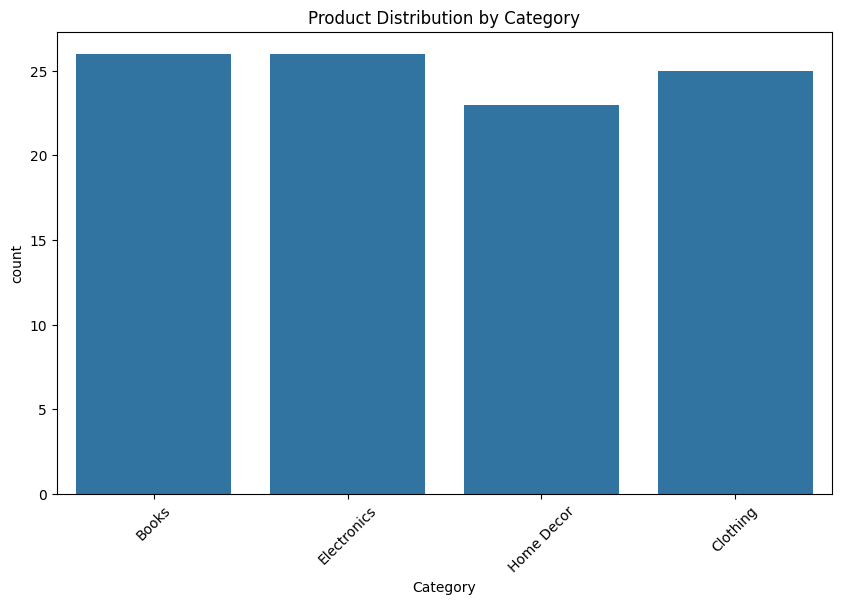






Plotting Price vs Total Value of Transactions...

Column names in merged data:
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


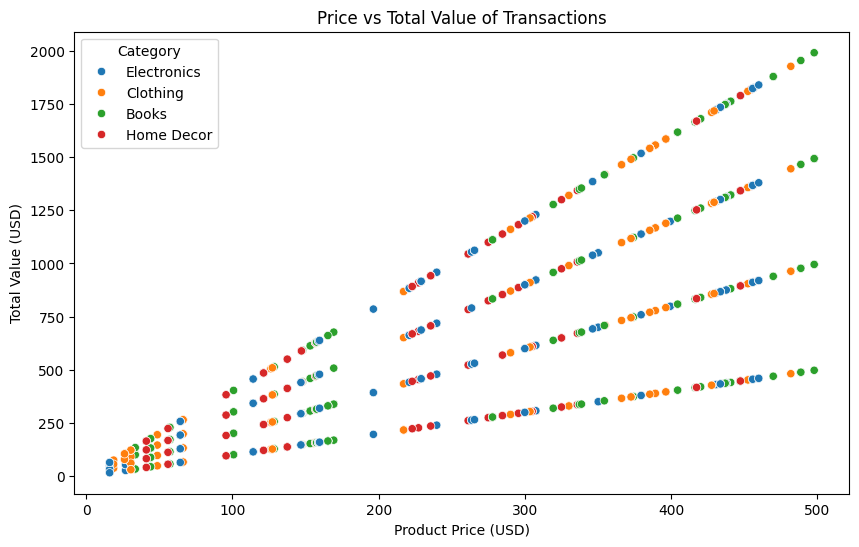






Summary statistics for merged data:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
5

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# ============================
# Step 1: Initial Data Inspection
# ============================
print("\n" + "="*50 + "\nCustomers Data:")
print(customers.head())
print(customers.info())

# Convert the 'SignupDate' column to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Check the data types again after conversion
print("\n" + "="*50 + "\nAfter converting 'SignupDate' to datetime:")
print(customers.info())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

print("\n" + "="*50 + "\nProducts Data:")
print(products.head())
print(products.info())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

print("\n" + "="*50 + "\nTransactions Data:")
print(transactions.head())
print(transactions.info())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 2: Check for Missing Values
# ================================
print("\n" + "="*50 + "\nMissing values in Customers dataset:")
print(customers.isnull().sum())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

print("\n" + "="*50 + "\nMissing values in Products dataset:")
print(products.isnull().sum())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

print("\n" + "="*50 + "\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 3: Check for Duplicates
# ================================
print("\n" + "="*50 + "\nDuplicates in Customers dataset:", customers.duplicated().sum())
print("Duplicates in Products dataset:", products.duplicated().sum())
print("Duplicates in Transactions dataset:", transactions.duplicated().sum())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 4: Merging Datasets
# ================================
# Merge Customers and Products with Transactions dataset
merged_data = transactions.merge(customers, on='CustomerID', how='left') \
                           .merge(products, on='ProductID', how='left')

# Check the first few rows after merging
print("\n" + "="*50 + "\nMerged Data Preview:")
print(merged_data.head())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 5: Data Distribution Analysis
# ================================

# ==========================
# Step 5.1: Customer Distribution by Region
# ==========================
print("\n" + "="*50 + "\nPlotting Customer Distribution by Region...")

plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

# ============================
# Step 5.2: Product Price Distribution
# ============================
print("\n" + "="*50 + "\nPlotting Product Price Distribution...")

plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 6: Transaction Analysis
# ================================

# ============================
# Step 6.1: Transaction Total Value Distribution
# ============================
print("\n" + "="*50 + "\nPlotting Transaction Total Value Distribution...")

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], kde=True, bins=30)
plt.title('Transaction Total Value Distribution')
plt.xlabel('Total Transaction Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

# ============================
# Step 6.2: Quantity Sold Distribution
# ============================
print("\n" + "="*50 + "\nPlotting Quantity Sold Distribution...")

plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Quantity'], kde=True, bins=30)
plt.title('Quantity Sold Distribution')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 7: Time-based Analysis
# ================================

# Convert dates to datetime format
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

# ============================
# Step 7.1: Customer Signups Over Time
# ============================
print("\n" + "="*50 + "\nPlotting Customer Signups Over Time...")

signup_by_month = merged_data.groupby(merged_data['SignupDate'].dt.to_period('M')).size()
signup_by_month.plot(kind='line', figsize=(12, 6), title='Customer Signups Over Time')
plt.xlabel('Signup Date')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")

# ============================
# Step 7.2: Transactions Over Time
# ============================
print("\n" + "="*50 + "\nPlotting Transactions Over Time...")

transactions_by_month = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M')).size()
transactions_by_month.plot(kind='line', figsize=(12, 6), title='Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 8: Correlation Analysis
# ================================
print("\n" + "="*50 + "\nPlotting Correlation Matrix...")

# Select numeric columns for correlation analysis
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns
correlation_matrix = merged_data[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 9: Product Category Distribution
# ================================
print("\n" + "="*50 + "\nPlotting Product Distribution by Category...")

plt.figure(figsize=(10, 6))
sns.countplot(data=products, x='Category')
plt.title('Product Distribution by Category')
plt.xticks(rotation=45)
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 10: Price vs Total Value
# ================================
print("\n" + "="*50 + "\nPlotting Price vs Total Value of Transactions...")

# Check for column names to see if Price_x and Price_y exist
print("\n" + "="*50 + "\nColumn names in merged data:")
print(merged_data.columns)

# Assuming 'Price_x' refers to 'Price' from transactions and 'Price_y' refers to 'Price' from products
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Price_y', y='TotalValue', hue='Category')  # Adjust column name
plt.title('Price vs Total Value of Transactions')
plt.xlabel('Product Price (USD)')
plt.ylabel('Total Value (USD)')
plt.show()

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")


# ================================
# Step 11: Summary Statistics
# ================================
print("\n" + "="*50 + "\nSummary statistics for merged data:")
print(merged_data.describe())

# Adding space between outputs
print("\n" + "="*50 + "\n\n\n")
